### Data visualization of Annamalai university FEAT First year students

<b>Importing the required modules

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
from guess_indian_gender import IndianGenderPredictor
from tqdm.notebook import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings('ignore')

<b>First I get the Data from the <a href= 'https://annamalaiuniversity.ac.in/adm/coun_admlist_be.php?admfor=910955a907e739b81ec8855763108a29'>Annamalai University website</a></b><br>
<b>But University closes the portal Now so I can;t fetch the data<br>
<b>So I clone the University site and put the Data in it<b><br>
<b> Then Now I get the data from that html file </b>

In [28]:
l=pd.read_html("login.html")
tables=len(l)
print(f"We get total {tables} tables from the website")

We get total 19 tables from the website


<b> This each tables represent the admission rounds which the selected in TNEA</b>
<p>So we create a new column Rounds and assign the admiison round to each students<p> 

In [29]:
dep=['Additional', 'Round - I', 'Round - I (Govt 7.5%)', 'Round - I (Upward)', 'Round - II', 'Round - II (Govt 7.5%)', 'Round - II (Upward)', 'Round - III', 'Round - III (Govt 7.5%)', 'Round - III (Upward)', 'Round - III (Upward) - Govt 7.5%', 'Round - IV', 'Round - IV (Govt 7.5%)', 'Round - IV (Upward)', 'SCA to SC', 'SPL', 'SPL - DAB (Govt 7.5%)', 'Supplementary', 'Supplementary (Govt 7.5%)']
for i,j in zip(range(0,len(dep)),dep):
    l[i]["Round"]=j

<b> Join the all tables using concat method </b>

In [30]:
final=pd.concat(l)
final.drop(final.columns[[0]],inplace=True,axis=1)
final

,Appl NO,Name,Branch,Dob,Community,Round
0,336870,SUDHA NANDHINI V,COMPUTER SCIENCE AND ENGINEERING (DATA SCIENCE),NaN,BC,Additional
0,404123,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I
1,337886,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I
2,400218,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I
3,318082,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I
...,...,...,...,...,...,...
22,601041,ANISKUMAR T,MECHANICAL ENGINEERING,NaN,MBC/DNC,Supplementary
23,601134,Diwan.P,MECHANICAL ENGINEERING,NaN,MBC/DNC,Supplementary
24,610273,AADHITHYAN T,MECHANICAL ENGINEERING,NaN,SC,Supplementary
0,600414,PHIZAL I,ELECTRICAL AND ELECTRONICS ENGINEERING,NaN,BC(Muslim),Supplementary (Govt 7.5%)


In [31]:
final.index=range(1,len(final)+1)

<b> Rename the columns </b>

In [35]:
final.columns=["Appl NO","Name","Branch","Dob","Community","Rounds"]
display(final.head())

,Appl NO,Name,Branch,Dob,Community,Rounds
1,336870,SUDHA NANDHINI V,COMPUTER SCIENCE AND ENGINEERING (DATA SCIENCE),NaN,BC,Additional
2,404123,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I
3,337886,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I
4,400218,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I
5,318082,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I


<b>Find The total no of students

In [36]:
total_std=final.shape[0]
print(f"Total No of Students= {total_std}")

Total No of Students= 743


<b>Display the students details based on admission Rounds which they are got selected using Bar diagram</b>

Total no of rounds of Admission is 19


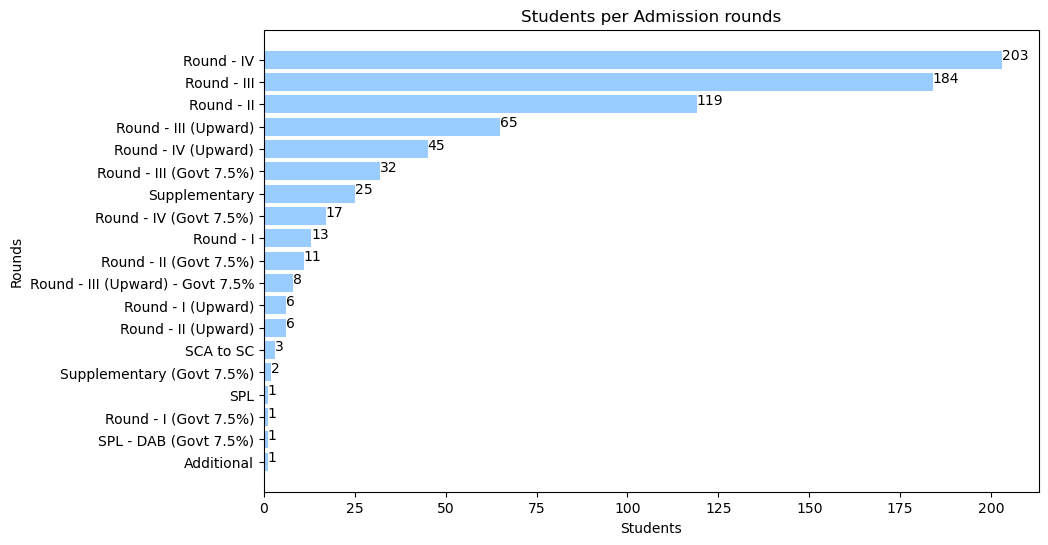

In [37]:
adm_rounds=final.Rounds.nunique()
print(f"Total no of rounds of Admission is {adm_rounds}")
count=final.groupby(["Rounds"]).size().reset_index(name="count")
count.sort_values("count",inplace=True)
plt.figure(figsize = (10,6))
x=count["Rounds"]
y=count["count"]
plt.barh(x,y,color="#99ccff")
plt.title("Students per Admission rounds")
plt.xlabel("Students")
plt.ylabel("Rounds")
for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.show()

<b>Display the students details based on admission rounds using pie diagram</b>

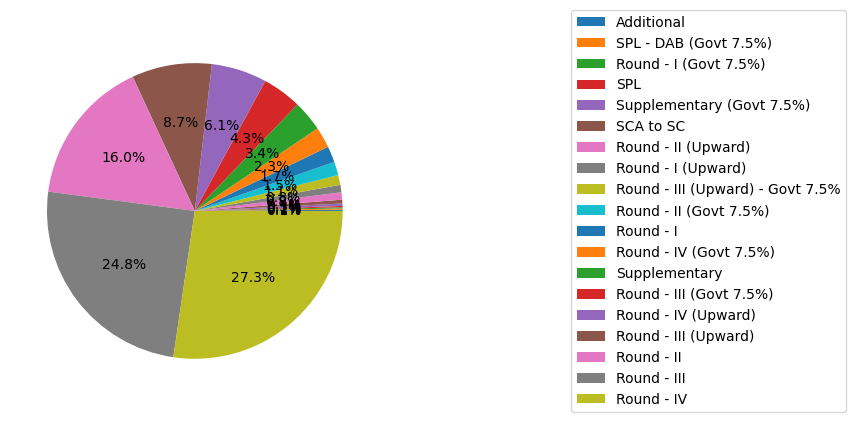

In [38]:
#display(count)
plt.pie(count["count"],autopct = '%1.1f%%')
plt.legend(labels=count["Rounds"],loc="center left",bbox_to_anchor =(1.5, 0,0.5, 1))
plt.show()

<b>Highlight the duplicate Department names 

In [39]:
pd.options.display.max_colwidth = 90
deps=pd.DataFrame(final.Branch.unique(),columns=["DEP"])
color = (deps["DEP"].str.contains("Artificial",case=False)).map({True: 'background-color: lightblue', False: ''})
deps.style.apply(lambda s: color)

,DEP
0,COMPUTER SCIENCE AND ENGINEERING (DATA SCIENCE)
1,COMPUTER SCIENCE AND ENGINEERING
2,COMPUTER SCIENCE AND ENGINEERING (Artificial Inteligence and MACHINELEARNING)
3,ELECTRICAL AND ELECTRONICS ENGINEERING
4,ELECTRONICS AND COMMUNICATION ENGINEERING
5,INFORMATION TECHNOLOGY
6,MECHANICAL ENGINEERING
7,CIVIL ENGINEERING
8,CIVIL AND STRUCTUTURAL ENGINEERING
9,COMPUTER SCIENCE AND ENGINEERING (ARTIFICIAL INTELLIGENCE AND MACHINELEARNING)


<b>Make the duplicate duplicate department names into one department

In [40]:
final["Branch"]=final["Branch"].str.upper()
final.loc[final["Branch"].str.contains("ARTIFICIAL"),"Branch"]="COMPUTER SCIENCE AND ENGINEERING (AI AND ML)"
dep2=pd.DataFrame(final.Branch.unique())
color = (dep2[0].str.contains("AI",case=False)).map({True: 'background-color: lightblue', False: ''})
dep2.style.apply(lambda s: color)

,0
0,COMPUTER SCIENCE AND ENGINEERING (DATA SCIENCE)
1,COMPUTER SCIENCE AND ENGINEERING
2,COMPUTER SCIENCE AND ENGINEERING (AI AND ML)
3,ELECTRICAL AND ELECTRONICS ENGINEERING
4,ELECTRONICS AND COMMUNICATION ENGINEERING
5,INFORMATION TECHNOLOGY
6,MECHANICAL ENGINEERING
7,CIVIL ENGINEERING
8,CIVIL AND STRUCTUTURAL ENGINEERING
9,CHEMICAL ENGINEERING


<b>Display the details of students based on their departments</b>

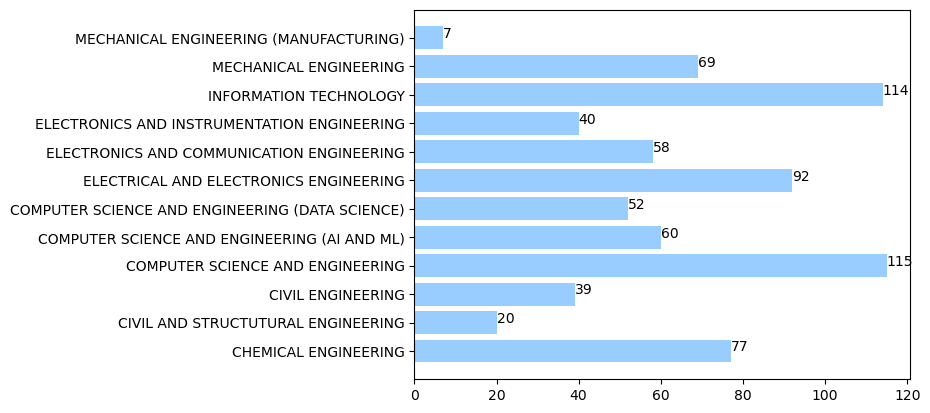

In [41]:
#student strength dep wise
df_dep=final.groupby(["Branch"]).size().reset_index(name="dep")
x=df_dep["Branch"]
y=df_dep["dep"]
plt.barh(x,y,color="#99ccff")
for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.show()

<b>display the details of students using pie diagram</b>

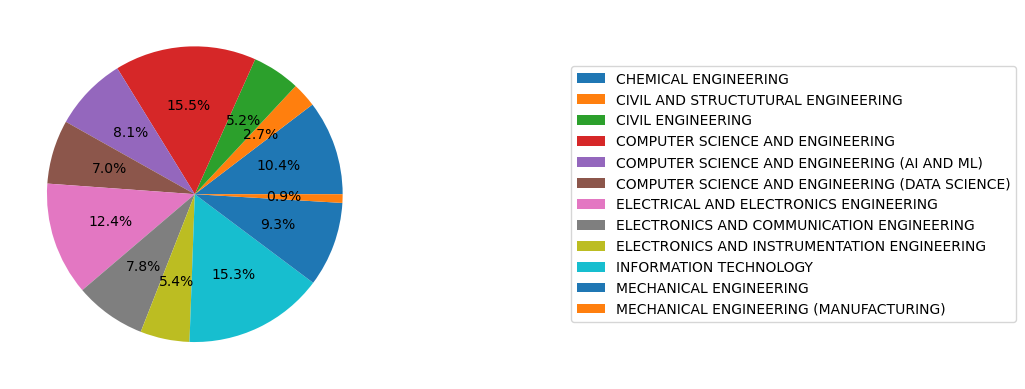

In [42]:
plt.pie(df_dep["dep"],autopct="%1.1f%%")
plt.legend(labels=df_dep["Branch"],loc="center left",bbox_to_anchor =(1.5, 0,0.5, 1))
plt.show()

<b>Find the Gender of each Student by IndianGenderPredictor Module </b>

In [45]:
def find_gender(names):
    names=names.replace("."," ")
    names=names.split()
    if len(names[0])<=2:
        names=names[1]
    else:
        names=names[0]
    i = IndianGenderPredictor()
    try:
        return i.predict(name=names) 
    except:
        return "NULL"
        

In [48]:
final_gender=final.head()
final_gender["gender"]=final_gender["Name"].progress_apply(find_gender)
display(final_gender)
#final.to_csv("genders.csv")
print("Creating the gender column using IndianGenderPredictor Module")
print("Note that the gender predicted by this Module is not accurate")

  0%|          | 0/5 [00:00<?, ?it/s]

,Appl NO,Name,Branch,Dob,Community,Rounds,gender
1,336870,SUDHA NANDHINI V,COMPUTER SCIENCE AND ENGINEERING (DATA SCIENCE),NaN,BC,Additional,male
2,404123,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,male
3,337886,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,male
4,400218,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I,male
5,318082,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female


Creating the gender column using IndianGenderPredictor Module
Note that the gender predicted by this Module is not accurate


<b>To run the the full module it takes more time So I just use it for first 10 rows

<b> I already have the gender data in excel file So I read the data From the file to avoid time waste each time <b>

In [52]:
final=pd.read_excel("gender.xlsx")

In [53]:
mech=final[final["Branch"]=="MECHANICAL ENGINEERING"]
mech["gender"]="male"
final.update(mech)

Display the Total number of male and female students by using p

,gender,count
0,female,336
1,male,407


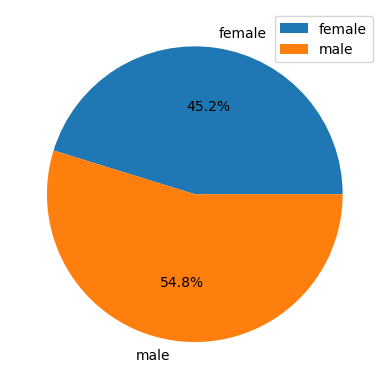

In [56]:
df_gender=final.groupby(["gender"]).size().reset_index(name="count")
display(df_gender)
plt.pie(df_gender["count"],labels=df_gender["gender"],autopct="%1.1f%%")
plt.legend(df_gender["gender"])
plt.show()

<b>Display the how many male and female students in each student by using Stacked Bar diagram

,SI.NO,Appl NO,Name,Branch,Dob,Community,Rounds,gender
0,1.0,201782.0,MOHAN K,COMPUTER SCIENCE AND ENGINEERING (AI AND ML),17/08/2004,BC,SPL,male
1,2.0,404123.0,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female
2,3.0,337886.0,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,male
3,4.0,400218.0,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I,female
4,5.0,318082.0,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female


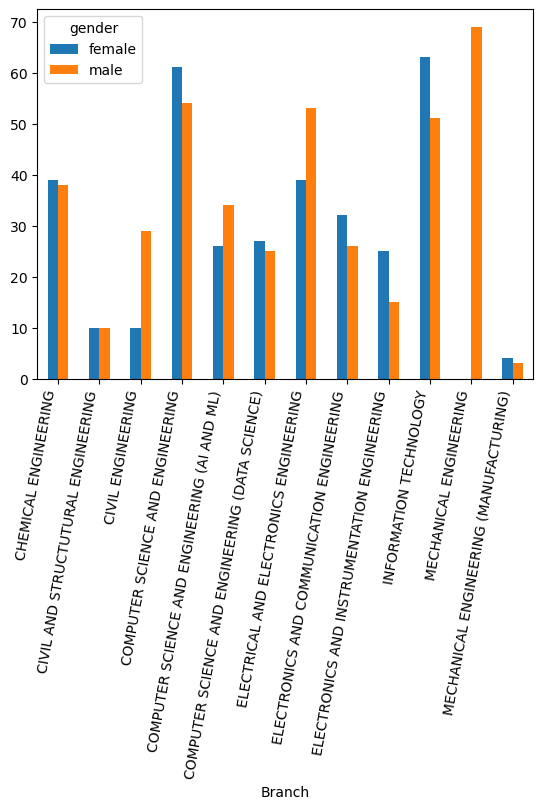

In [57]:
display(final.head())
final.groupby("gender").Branch.value_counts().unstack(0).plot.bar()
plt.xticks(rotation=80,ha="right")
plt.show()